<a href="https://colab.research.google.com/github/SayyedAliT/CA3/blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install keras
!pip install tensorflow
!pip install scipy
!pip install numpy
!pip install matplotlib


**Part 1:**

1.   **Question 1:**

  *   برخی ویژگی های اتوانکدرها:
      *  حذف نویز تصاویر:دینویزینگ (Denoising)، فرایند حذف نویز از یک سیگنال است. این سیگنال می‌تواند یک تصویر، صدا یا یک سند باشد. می‌توان یک شبکه خودرمزگذار را به منظور یادگیری نحوه حذف نویز از تصاویر، آموزش داد.
      * تشخیص ناهنجاری: در آمار، نقاط پرت یا ناهنجاری‌ها، نقاط داده‌ای هستند که به جمعیت مشخصی تعلق ندارند. این یک مشاهده غیرطبیعی است که با مقادیر دیگر فاصله دارد. یک ناهنجاری، مشاهده‌ای است که از داده‌های خوب ساختار یافته جدا می‌شود.
      وقتی مشاهدات فقط یک دسته اعداد و یک بعدی هستند، تشخیص آن‌ها آسان است، اما وقتی هزاران مشاهده چند بعدی داشته باشید، برای تشخیص این مقادیر به روش‌های هوشمندانه­‌تری نیاز خواهید داشت
      *      3-رنگ آمیزی تصاویر

      *      4-بازیابی اطلاعات

      *      5-کاهش ابعاد

      *      6-استخراج ویژگی

      *      7-تولید تصویر
















Part 1:

**Question 2:**

این رخداد به این دلیل است که هنگام انکود کردن، ما بخش های مهم داده مان را حفظ میکنیم و تعداد گره های موجود در latent رو محدود میکنیم که این باعث میگردد تا همه اطلاعات و دیتا های موجود در عکس های ما به فضای پنهان منتقل نشود و فقط بخشی از ان در ان قسمت ذخیره شود حال برای تبدیل کردن بخش انکود شده به عکس اصلی، با توجه به اینکه مقداری از داده های عکس ابتدایی ما در این فایل موجود نیستند، شبکه های عصبی، خود با توجه به چیزی که یادگرفته اند، شروع به تولید فایل نهایی میکنند که این باعث میگردد تا مقداری از داده های ما، داده های فایل اصلی نباشند. بلکه توصیف شبکه عصبی از کلیت فایل ما باشند.

Part 1:

**Question 3:**

In [7]:
from keras.datasets import mnist
import numpy as np

(_, _) , (test_images, _) = mnist.load_data()
test_images = test_images.reshape(test_images.shape[0] , -1)
test_images = test_images.astype('float32') / 255.0


In [8]:
import numpy as np, random
def set_seed(seed):
    np.random.seed(seed)
    random.seed(seed)
set_seed(810109203)

**Question 3:**
*   **part a,b:**


In [9]:


import tensorflow as tf

autoencoder = tf.keras.models.load_model('mnist_AE.h5')
reconstructed_images = autoencoder.predict(test_images)




313/313 [==============================] - 2s 5ms/step


  * **part c:**

In this part, we auto-encode 4 photos experimentally and then return it to the original state to see the difference between the photos.
The code of this section is as follows:



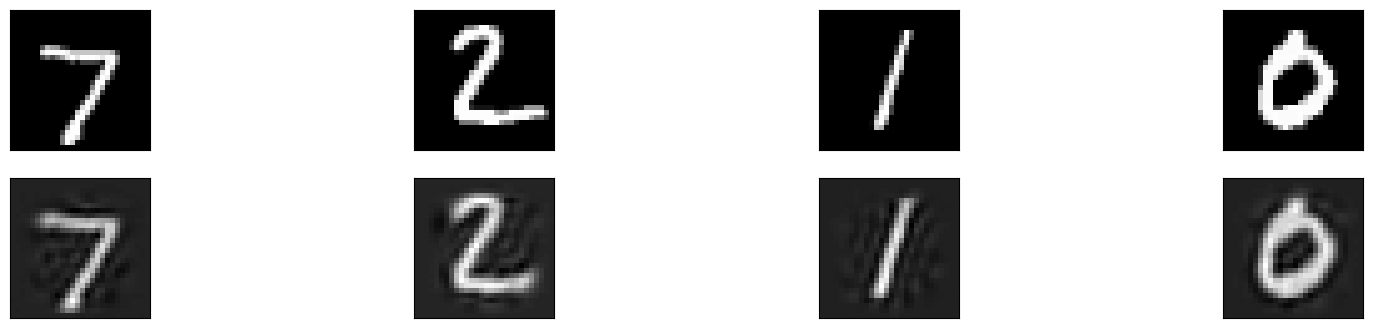

In [10]:

import matplotlib.pyplot as plt

n = 4  # sample size
plt.figure(figsize=(20, 4))
for i in range(n):
    # نمایش تصاویر اصلی
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # نمایش تصاویر بازسازی شده
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



**همانگونه که مشاهده کردیم، تصاویر به صورت تار شده و عدم مطابقت کامل به عکس اولیه به ما نشان داده شده اند. دلیل این امر در ابتدای فایل توضیح داده شده است .**

  * **part d:**
  
  برای حساب کردن mse نیاز است تا تابع زیر را بنویسیم:


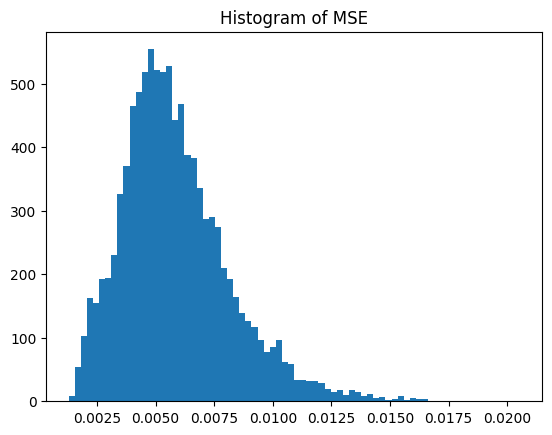

In [11]:
def mse(num1, num2):
    return (num1 - num2) ** 2

# errors = [mse(test_images[i], reconstructed_images[i]) for i in range(len(test_images))]
errors = [0] * len(test_images)
for i in range(len(test_images)):
  for j in range(len(test_images[i])):
    errors[i] += mse(test_images[i][j],reconstructed_images[i][j])
for i in range(len(errors)):
    errors[i] /= len(test_images[i])
plt.hist(errors, bins='auto')
plt.title("Histogram of MSE")
plt.show()



  * **part d:**

  mean and std به ترتیب برابر با میانگین و  انحراف معیار خطای داده های ما هست

In [18]:
from scipy import stats

mean = np.mean(errors)
std = np.std(errors)
ks_statistic, p_value = stats.kstest(errors, cdf='norm', args=(mean, std))

print(f"KS statistic: {ks_statistic}")
print(f"P-value: {p_value}")

KS statistic: 0.07001430987307489
P-value: 4.538477997819536e-43


مقدار pvalue ما کمتر از 0.05 است
در نتیجه نظریه ما رد می شود.
